# Fandango Rating Investigation

Fandango has been caught in the past inflating the movie ratings on their website. ([FiveThirtyEight Article](https://fivethirtyeight.com/features/fandango-movies-ratings/))

The goal of this project is to determine if Fandango is still inflating the ratings of movies

We have a dataset from Fandango describing movie ratings before the scandal, and a different dataset describing movie ratings after the scandal

# Import/Explore Data

In [1]:
## import modules and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fango = pd.read_csv('fandango_score_comparison.csv')       # data up until 2015 scandal
movie = pd.read_csv('movie_ratings_16_17.csv')             # data after 2015 scandal


In [2]:
## explore data
fango.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [3]:
## explore 2016-2017 movie ratings
movie.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


# Isolating columns relevant to our investigation

In [4]:
fang = fango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fang.head()


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
movi = movie[['movie','year','fandango']].copy()
movi.head()


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [6]:
fango['Fandango_votes'].describe()


count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

# Comparing distribution plots of 2015 and 2016 fandango ratings

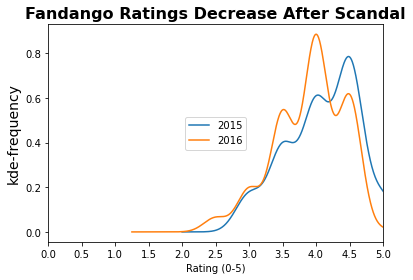

In [7]:
%matplotlib inline

fang['Fandango_Stars'].plot.kde(label='2015')
movi['fandango'].plot.kde(label='2016')
plt.legend(loc='center')
plt.title('Fandango Ratings Decrease After Scandal', fontsize=16, weight='bold')
plt.xlabel("Rating (0-5)")
plt.ylabel('kde-frequency', fontsize=14)
plt.xlim(0, 5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.style.use('fivethirtyeight')
plt.show()


#### This KDE plot indicates that there was a shift in the fandango ratings after the scandal

# Bar plot

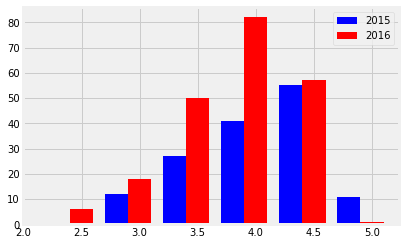

In [8]:
%matplotlib inline

x = fang['Fandango_Stars'].value_counts().sort_index()
plt.bar(x.index-.2, x, label='2015', color='b', width=.2)

y = movi['fandango'].value_counts().sort_index()
plt.bar(y.index, y, label='2016', color='r', width=.2)

plt.xticks([2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.legend()
plt.show()


### This bar plot shows a significant increase in ratings of 4.0, and a decrease of 5.0 ratings. Not necessairly conclusive that their ratings have shifted

# Comparing Summary Statistics

In [9]:
fang_mean = fang['Fandango_Stars'].mean()
fang_medn = fang['Fandango_Stars'].median()
fang_mode = fang['Fandango_Stars'].mode()[0]

movi_mean = movi['fandango'].mean()
movi_medn = movi['fandango'].median()
movi_mode = movi['fandango'].mode()[0]

stats = pd.DataFrame()
stats['2015'] = [fang_mean, fang_medn, fang_mode]
stats['2016'] = [movi_mean, movi_medn, movi_mode]
stats.index = ['mean', 'median', 'mode']


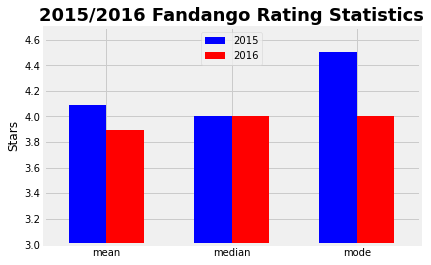

In [10]:
%matplotlib inline

stats['2015'].plot.bar(width=.3, color='b', label='2015', position=1)
stats['2016'].plot.bar(width=.3, color='r', label='2016', position=0, rot=0)
plt.ylim(3,4.7)
plt.legend(loc='upper center')
plt.xlim(-.5,2.5)
plt.ylabel('Stars')
plt.title('2015/2016 Fandango Rating Statistics', fontsize=18, weight='bold')
plt.show()


# Conclusion:

The rating statistics indicate that there has been a decrease in the average rating, as well and the mode. Taking this information with the left shifted KDE plot, I believe Fandango's overall movie ratings did decrease after the scandal. 